In [25]:
import pandas as pd
from sklearn.cluster import KMeans
class tools ():
    def get_data_train_dataframe(self):
        data_train =[]
        with open(r"D:\\www\\data\\Weibo Data\\Weibo Data\\weibo_train_data(new)\\weibo_train_data.txt",'r',encoding='utf-8') as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                    pass
                array = line.split("\t")
                data_train.append([array[0],int(array[3]),int(array[4]),int(array[5])])

        data_train = pd.DataFrame(data_train,columns=['uid','forward_count','comment_count','like_count'],index=None)
        return data_train

In [26]:
data_train = tools.get_data_train_dataframe(tools)
fclsum = data_train.groupby(by='uid').sum()

In [28]:
fcltotal = fclsum['forward_count']+fclsum['comment_count']+fclsum['like_count']
data = pd.concat([fclsum,pd.DataFrame(fcltotal)],axis=1)

In [32]:
import numpy as np
data_array = np.array(data,dtype=float)

In [35]:
from sklearn.cluster import KMeans
X=data_array
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [37]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 ..., 0 0 0]
[[  7.00664609e+01   3.16892229e+01   3.86483962e+01   1.40404080e+02]
 [  8.29080000e+05   8.90510000e+04   4.34790000e+05   1.35292100e+06]
 [  3.94015000e+05   5.02310000e+04   2.53574000e+05   6.97820000e+05]
 [  8.59255000e+04   3.75878333e+04   9.93975000e+04   2.22910833e+05]]


In [ ]:
labels_list = kmeans.labels_

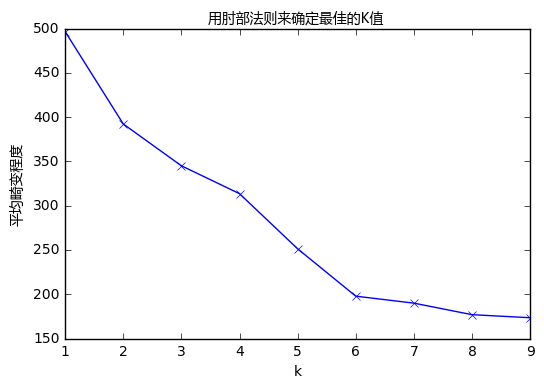

In [41]:
# http://blog.csdn.net/buracag_mc/article/details/75727895
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)
from scipy.spatial.distance import cdist
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(
        cdist(X,kmeans.cluster_centers_,
              'euclidean'),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度',fontproperties=font)
plt.title(u'用肘部法则来确定最佳的K值 ',fontproperties=font)
plt.show()

In [42]:
# from sklearn import metrics
# 
# kmeans_model=KMeans(n_clusters=6).fit(X)  # K-Means聚类，聚类数为k
# 
# s = metrics.silhouette_score(X,kmeans_model.labels_,metric='euclidean') # 轮廓系数得分
# s

MemoryError: 